# Street Tree Data
---

Preliminary peek at tree data

## Load the Data
We'll load from the web if the file isn't available locally

In [1]:
import pandas as pd
import os
import urllib

FILE_PATH = 'Street_Tree_List.csv'
DATA_SOURCE_URL = 'https://data.sfgov.org/api/views/tkzw-k3nq/rows.csv?accessType=DOWNLOAD'

# Load from interwebs
if not os.path.isfile(FILE_PATH):
    urllib.urlretrieve (DATA_SOURCE_URL, FILE_PATH)
    
df_trees = pd.read_csv(FILE_PATH)

## First Peek

What data types and quantities do we have?

In [2]:
from IPython.display import display

display(df_trees.columns)

Index([u'TreeID', u'qLegalStatus', u'qSpecies', u'qAddress', u'SiteOrder',
       u'qSiteInfo', u'PlantType', u'qCaretaker', u'qCareAssistant',
       u'PlantDate', u'DBH', u'PlotSize', u'PermitNotes', u'XCoord', u'YCoord',
       u'Latitude', u'Longitude', u'Location'],
      dtype='object')

Populating the interactive namespace from numpy and matplotlib


qCareAssistant
Arts Commission           Axes(0.125,0.125;0.775x0.775)
City College              Axes(0.125,0.125;0.775x0.775)
Cleary Bros. Landscape    Axes(0.125,0.125;0.775x0.775)
DPW                       Axes(0.125,0.125;0.775x0.775)
DPW for City Agency       Axes(0.125,0.125;0.775x0.775)
Dept of Real Estate       Axes(0.125,0.125;0.775x0.775)
FUF                       Axes(0.125,0.125;0.775x0.775)
Fire Dept                 Axes(0.125,0.125;0.775x0.775)
Housing Authority         Axes(0.125,0.125;0.775x0.775)
MTA                       Axes(0.125,0.125;0.775x0.775)
Port                      Axes(0.125,0.125;0.775x0.775)
Private                   Axes(0.125,0.125;0.775x0.775)
Rec/Park                  Axes(0.125,0.125;0.775x0.775)
SFUSD                     Axes(0.125,0.125;0.775x0.775)
dtype: object

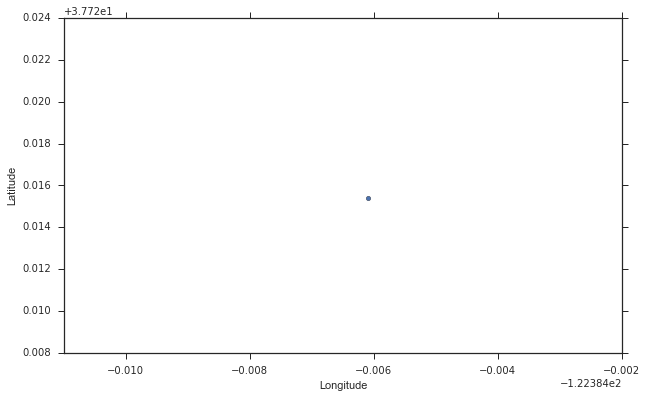

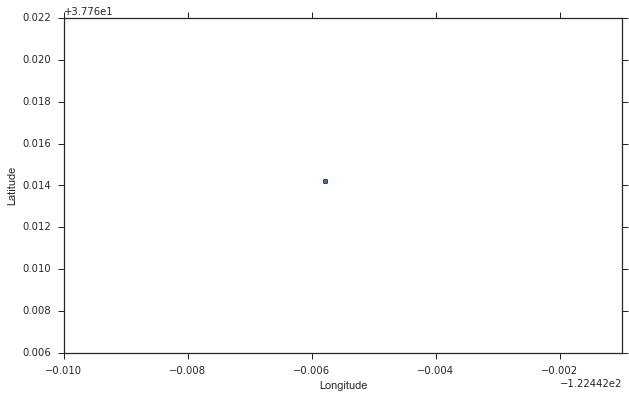

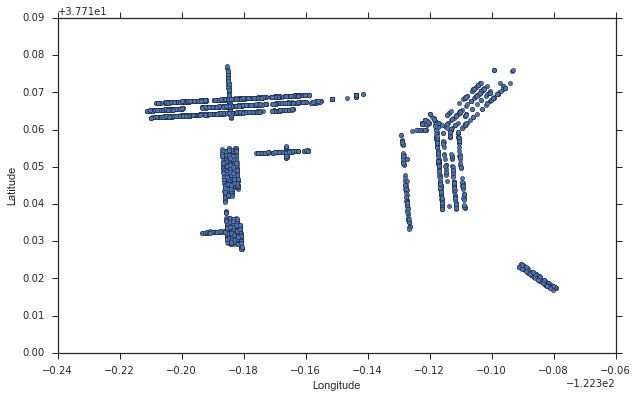

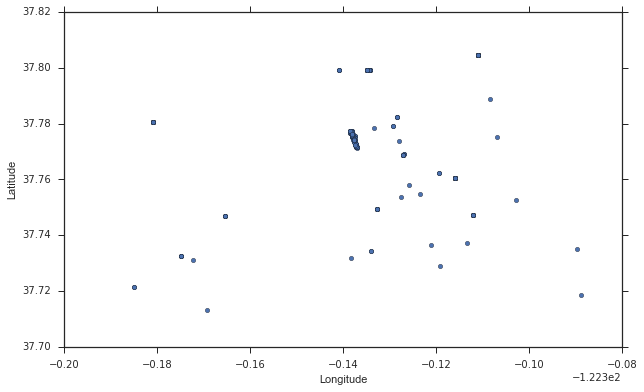

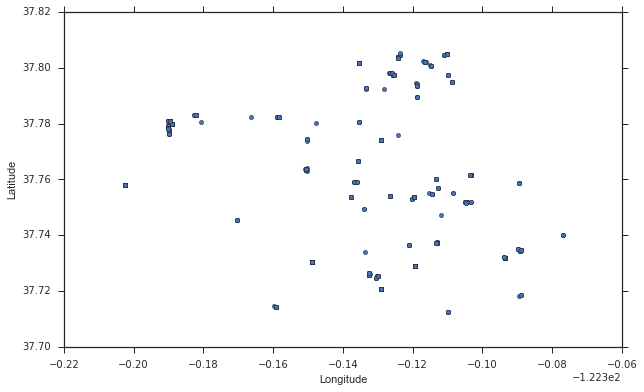

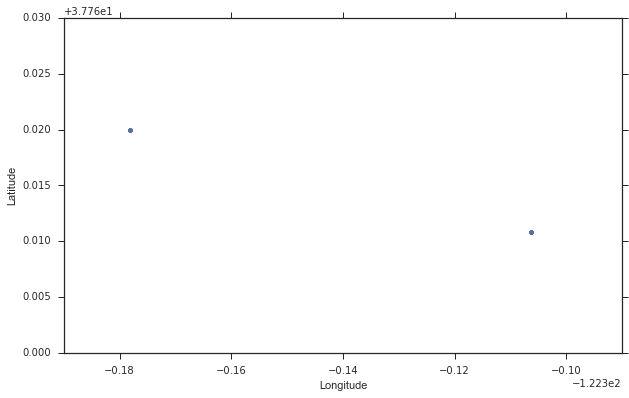

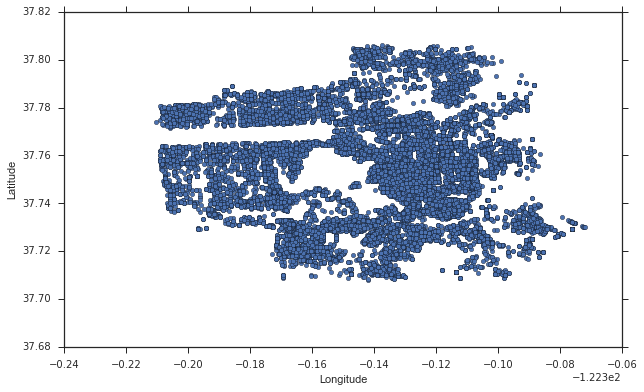

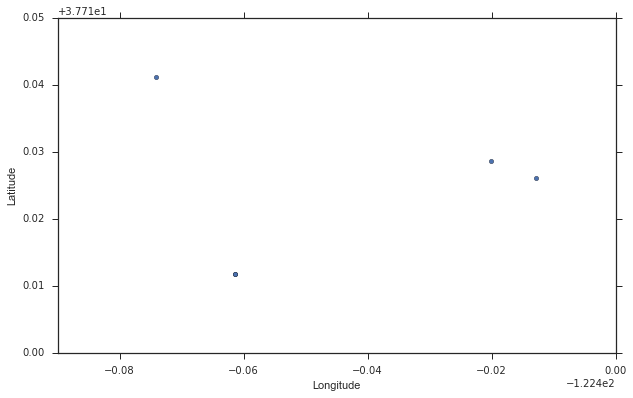

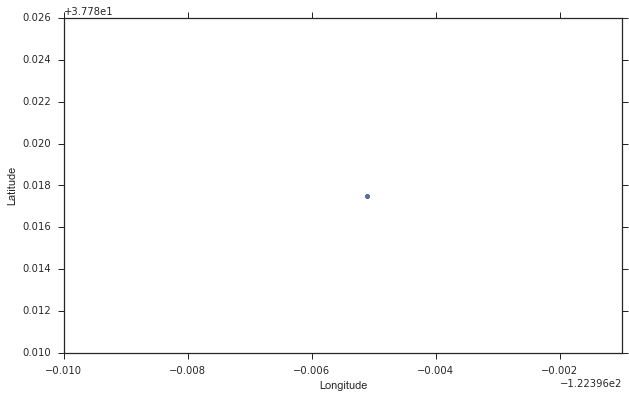

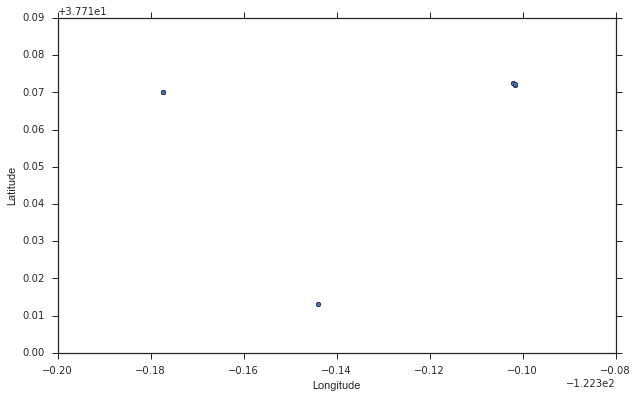

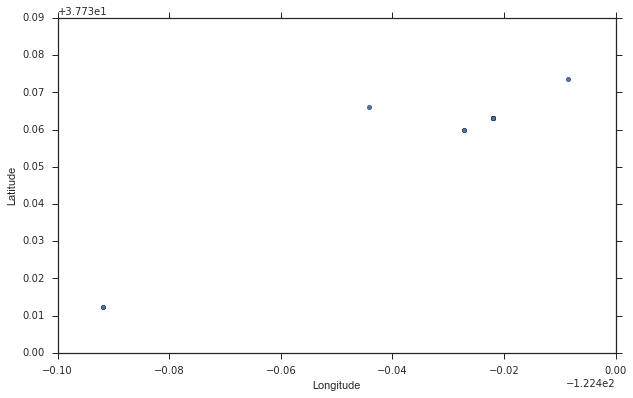

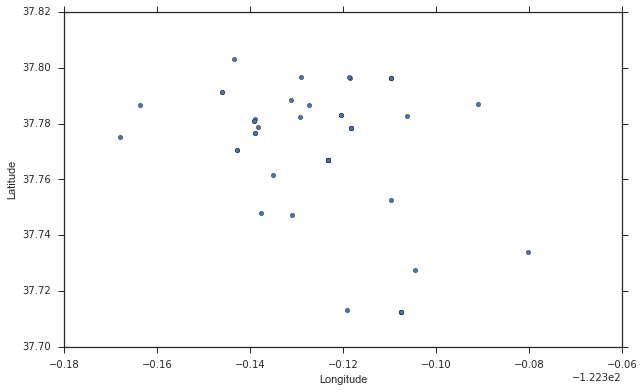

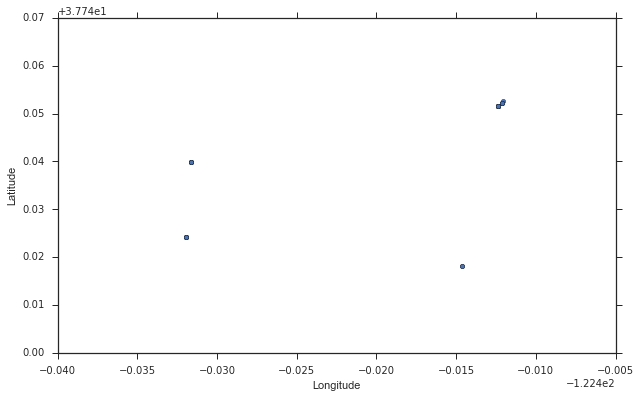

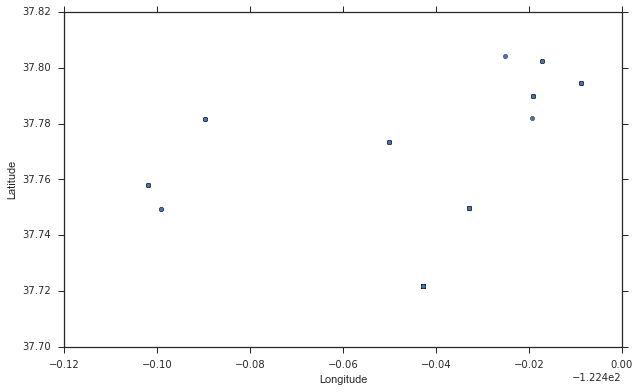

In [20]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

df_valid_cord = df_trees[df_trees.Latitude > 37.6]

# Look at secondary caretakers, looking specifically for FuF
df_valid_cord.groupby('qCareAssistant').plot(kind='scatter', x='Longitude', y='Latitude')

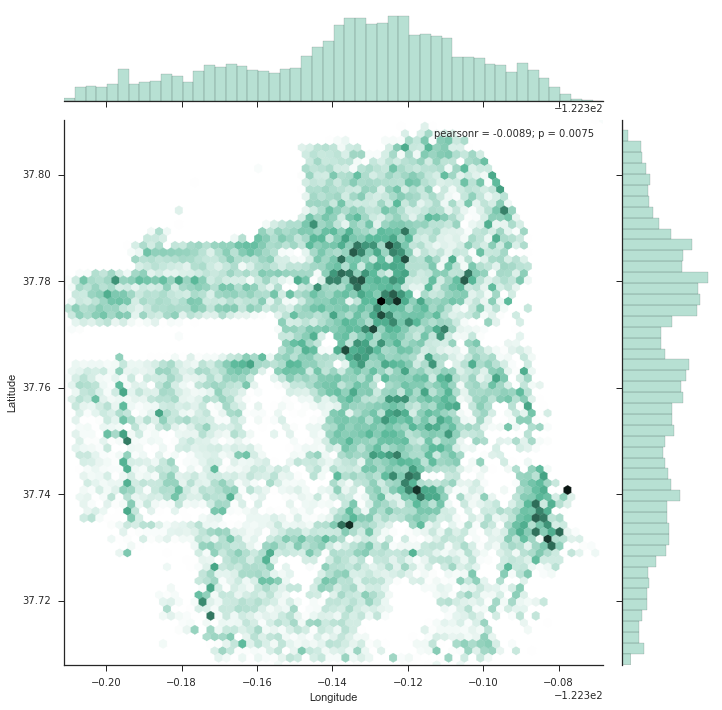

In [22]:
import seaborn as sns
sns.set(style="ticks")

# Pretty plot with seaborn to look at tree distributions
sns.jointplot(df_valid_cord.Longitude, df_valid_cord.Latitude, kind="hex", color="#4CB391", size=10)